# Hotel Review Sentiment Analysis - NLP

In [115]:
import warnings # this library is downloaded warn programmers about changes in language 
# or library features in anticipation of backwards incompatible changes coming with Python 3.0.

In [116]:
warnings.filterwarnings('ignore')

In [117]:
import os
# The OS module in Python provides functions for interacting with the operating system. 
# OS comes under Python's standard utility modules. 
#This module provides a portable way of using operating system-dependent functionality

In [118]:
dir_path = 'F:\\'
os.chdir(dir_path) # Python method chdir() changes the current working directory to the given path

# Data Facts and Import

In [119]:
import pandas as pd


In [120]:
review_data = pd.read_csv('C:/Users/BADRI/Desktop/ML Projects/Hotel - Sentiment Analysis - Logistic Regression/train.csv')

In [121]:
review_data # Data available with label and the target variable/output is "Is_response"
# data credit : https://www.kaggle.com/anu0012/hotel-review

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [122]:
review_data.shape # Shape command shared how many rows and colom - 38932 Rows and 5 Colums

(38932, 5)

In [123]:
review_data.head()  # () provides data in data frame structure. head function provides
# top 5 rows

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [124]:
review_data.info() # info function provides total number of colums, row, 
# if we have any null data and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [125]:
review_data.describe() # describe function provides basic demographic of data
# count - all colums has same number, means no null data
# unique - How many unique types of data in that colum, for example 3 in Device_used to
# reflects how may types of devises used by users for uploaded 38932 feedback
# Top - Would have taken because of its unique comments Name?

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38912,11,3,2
top,id37986,#NAME?,Firefox,Desktop,happy
freq,1,21,7367,15026,26521


# Data Cleaning or EDA - Exploratory Data Analysis
#### checking for missing values in the dataset and to printing the percentage of missing value

In [126]:
count = review_data.isnull().sum().sort_values(ascending=False)
# isnull() : function used for detecting any NaN or missing values
# sort_values : sort_values() function sorts a data frame in Ascending or Descending order of passed Column.

In [127]:
percentage = ((review_data.isnull().sum()/len(review_data))*100).sort_values(ascending=False)
# Simple formula is used sum of total null data divided by length of total data

In [128]:
missing_data = pd.concat([count,percentage], axis=1,keys=['count','percentage'])
# Understanding this code
# Concatfunction : This function merges two data set on on the axis 0 or 1 0=Rows, 1=Colums
# Keysfunction : This function is used labelling without that it will be reflected as 0 or 1


In [129]:
missing_data # as per this no missing data in any of the colums, hence no loss of data and we dont need to take any action

,count,percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


In [130]:
# finding the distribution in Percentage of Happy and Not Happy customers 
# we will down matplot libraray for graphs

import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
print('percentage for default')

percentage for default


In [132]:
bar_plot = round(review_data.Is_Response.value_counts(normalize=True)*100,2)
# round() which rounds off to the given number of digits
# Value_counts function : returns object containing counts of unique value, 
# multiplying with 100 converts into %
bar_plot

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64

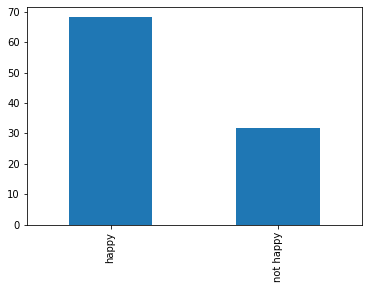

In [133]:
# plotting bar plot
bar_plot.plot(kind='bar')
# plot - this function reflect is used to make 2D plot on points x and y
# kind - reflects the type of graph you wants 

# Removing of data which is not relevant

In [134]:
review_data.drop(columns=['User_ID'], inplace=True)

1. drop function used for removing columns or row as per the requirement
2. inplace=True : inplace function used for permanent removal of colum or rows

In [135]:
review_data

,Description,Browser_Used,Device_Used,Is_Response
0,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [137]:
# as we are dealing with text data, hence its important to clean data
import re #module re provides full support for Perl-like regular expressions in Python.
#The re module raises the exception re. error if an error occurs while compiling or using a regular expression. 

import string # import string library function inorder to use ascii_letters
#ascii - American Standard code for information interchangekeys strings or letters mapped to standard ASCII values
# For example, the Escape key (ESC) is 27 in ASCII and the Delete key (DEL) is 127

In [155]:
# below function coverts to lower case, removes square bracket, removes number and punctuation
# def is short for “define”. 
# It's a keyword that you need to define a function (aka method). 
#All the code that you put between the def function_name(parameters) and end will be executed every time you call the function_name later
def text_clean1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [156]:
cleaned1 = lambda x: text_clean1(x)

In [157]:
# looking at updated text 
review_data['cleaned_description'] = pd.DataFrame(review_data.Description.apply(cleaned1))
review_data.head()

,Description,Browser_Used,Device_Used,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriends and i stayed here to celebrate ...


In [160]:
# cleaning for quotes,"",'', ...
def text_clean2(text):
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    return text
cleaned2 = lambda x: text_clean2(x)
review_data['cleaned_description_new'] = pd.DataFrame(review_data.Description.apply(cleaned2))
review_data.head()

,Description,Browser_Used,Device_Used,Is_Response,cleaned_description,cleaned_description2,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...,The room was kind of clean but had a VERY stro...,The room was kind of clean but had a VERY stro...
1,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,i stayed at the crown plaza april april th...,I stayed at the Crown Plaza April -- - April -...,I stayed at the Crown Plaza April -- - April -...
2,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...,I booked this hotel through Hotwire at the low...,I booked this hotel through Hotwire at the low...
3,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...,Stayed here with husband and sons on the way t...,Stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriends and i stayed here to celebrate ...,My girlfriends and I stayed here to celebrate ...,My girlfriends and I stayed here to celebrate ...


In [161]:
review_data.drop(columns=['cleaned_description2','Browser_Used','Device_Used'], inplace=True)

In [162]:
review_data.head()

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,The room was kind of clean but had a VERY stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,I stayed at the Crown Plaza April -- - April -...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,I booked this hotel through Hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,Stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,My girlfriends and I stayed here to celebrate ...


# Model Training - Logistic Regression
##### Once cleaning of data is doing, next step is of model training

In [164]:
from sklearn.model_selection import train_test_split

In [166]:
# calling the colums which are needed for Train and test (independent and dependent)
independent_variable = review_data.cleaned_description_new
dependent_variable = review_data.Is_Response

In [176]:
iv_train, iv_test, dv_train, dv_test = train_test_split(independent_variable,dependent_variable,test_size = 0.1, random_state = 225)
print('iv_train:',len(iv_train))
print('iv_test:',len(iv_test))
print('dv_train:',len(dv_train))
print('dv_test:',len(dv_test))
# test_size : reflects the sample size for test 0.1 means 10% of total, remaining is training set
# Random_state :simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

iv_train: 35038
iv_test: 3894
dv_train: 35038
dv_test: 3894


In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

TFID = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [184]:
model = Pipeline([('vectorizer',TFID),('classifier',LR)])
model.fit(iv_train,dv_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [186]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(iv_test)
confusion_matrix(predictions,dv_test)

array([[2417,  304],
       [ 154, 1019]], dtype=int64)

# Model Prediction

### for model prediction we need to understand accuracy score, precision score, recall score. Higher these scores, its better

1. **Accuracy Score**: is the proportion of correct predictions over total predictions
2. **Precision Score** : is the number of correct results divided by the number of all returned results
3. **Recall Score** : recall refers to the percentage of total relevant results correctly classified by your algorithm

In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy :', accuracy_score(predictions, dv_test)*100)
print('Precision :', precision_score(predictions, dv_test, average = 'weighted')*100)
print('Recall :', recall_score(predictions, dv_test, average = 'weighted')*100)

Accuracy : 88.23831535695943
Precision : 88.89271415963718
Recall : 88.23831535695943


* as Accuracy, Precision & Recall percentage are higher, hence our model prediction is great 

# Trying this model on new observations

In [214]:
example = ["This hotel is a keeper! First, you get a full breakfast buffet every morning."]
result = model.predict(example)
print(result)

['happy']
